In [55]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [56]:
def plotData(x, y, x_label="Driving_Hours", y_label='Risk_Score'):
    plt.figure(figsize=(6,6))
    plt.xlabel(x_label)
    plt.ylabel(y_label)
    plt.scatter(x,y)
    return plt

In [57]:
def plotRegressionLine(x, y, y_pred, x_label="Driving_Hours", y_label='Risk_Score'):
    plt = plotData(x, y, x_label, y_label)
    plt.plot(x, y_pred, color="Red", linewidth=3)
    plt.show()

In [58]:
def calR2score(x, y, y_pred):
    y_mean = y.mean()
    SStot = sum((y-y_mean)**2)
    SSres = sum((y-y_pred)**2)
    r2_score = 1-(SSres/SStot)
    return r2_score

In [59]:
def correlationCoef(x,y):
    x_mean=x.mean()
    y_mean=y.mean()
    num = sum((x-x_mean)*(y-y_mean))
    den = (sum((x-x_mean)**2)*sum((y-y_mean)**2))**0.5
    coef = num/den
    return coef

In [60]:
data = {
    "Driving_Hours" : [10,9,2,15,10,16,11,16],
    "Risk_Score" : [95,80,10,50,45,98,38,93]
}

df = pd.DataFrame.from_dict(data)

In [61]:
df

,Driving_Hours,Risk_Score
0,10,95
1,9,80
2,2,10
3,15,50
4,10,45
5,16,98
6,11,38
7,16,93


In [62]:
x = np.array(df["Driving_Hours"])
y = np.array(df["Risk_Score"])

In [63]:
correlationCoef(x,y)

0.6611314653759117

<module 'matplotlib.pyplot' from 'C:\\Users\\nikhi\\Anaconda3\\lib\\site-packages\\matplotlib\\pyplot.py'>

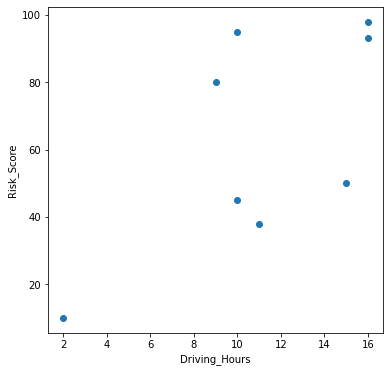

In [64]:
plotData(x,y)

In [65]:
def calcCoefficient(x,y):
    x_mean = x.mean()
    y_mean = y.mean()
    coef = (sum((x-x_mean)*(y-y_mean))/sum((x-x_mean)**2))
    intercept = y_mean - coef*x_mean
    return coef, intercept

In [66]:
w, w0 = calcCoefficient(x,y)
y_pred = w*x + w0

Coefficient :  4.58789860997547
Intercept :  12.584627964022893
R2 Score :  0.43709481451010035
Equation : Y= 4.58789860997547*x + 12.584627964022893


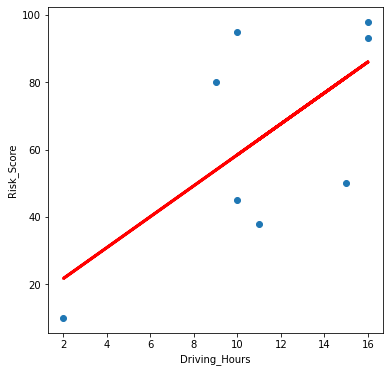

In [67]:
print("Coefficient : ", w)
print("Intercept : ", w0)
print("R2 Score : ", calR2score(x, y, y_pred))
print(f"Equation : Y= {w}*x + {w0}")
plotRegressionLine(x,y,y_pred)

# Sklearn Implementation

In [77]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression

In [78]:
data = {
    "Driving_Hours" : [10,9,2,15,10,16,11,16],
    "Risk_Score" : [95,80,10,50,45,98,38,93]
}

df = pd.DataFrame.from_dict(data)

x = np.array(df["Driving_Hours"])
y = np.array(df["Risk_Score"])

In [79]:
x = np.array(x).reshape(-1,1)

In [80]:
def calR2score(x, y, y_pred):
    y_mean = y.mean()
    SStot = sum((y-y_mean)**2)
    SSres = sum((y-y_pred)**2)
    r2_score = 1-(SSres/SStot)
    return r2_score

Coefficient:  4.587898609975469
Intercept:  12.584627964022907
R2 score:  0.43709481451010035
Equation: Y = 4.587898609975469*x+12.584627964022907


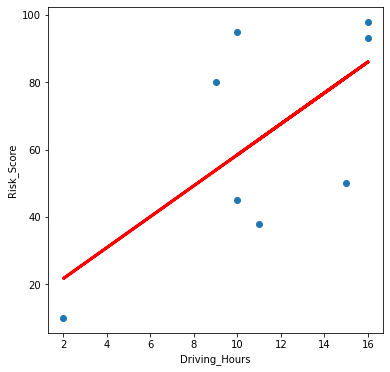

In [81]:
model = LinearRegression()
model.fit(x, y)
y_pred = model.predict(x)
print("Coefficient: ",model.coef_[0])
print("Intercept: ",model.intercept_)
print("R2 score: ",calR2score(x, y, y_pred))
print(f"Equation: Y = {model.coef_[0]}*x+{model.intercept_}")
plotRegressionLine(x, y, y_pred)